In [2]:
import numpy as np
rng = np.random.default_rng(2025)


import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='Open Sans'

In [63]:
def plot_series(seriess):

    n_series = len(seriess)
    colors = plt.colormaps['coolwarm'](np.linspace(0,1,n_series))

    fig, ax = plt.subplots(1,1,figsize=(4,2), dpi=200)

    for color, series in zip(colors, seriess):
        ax.plot(series, c=color, linewidth=0.5, alpha=0.2)

    ax.set_xlabel('Time [steps]')
    ax.set_ylabel('Amount [units]')

Consider the reaction 

$$
A \longrightarrow \empty
$$

happening at some rate $k$.



**Naive SSA**

We fix $\Delta t$, and a starting number of molecules $A(0)$ and consider the following algoritm
1. Extract $r \sim U(0,1)$
2. If $r < A(t) k \Delta t$, single molecule decayed (multiple decays are order $\Delta t^n$) we sutract $1$ from $A$. Otherwise we leave it as it is. 

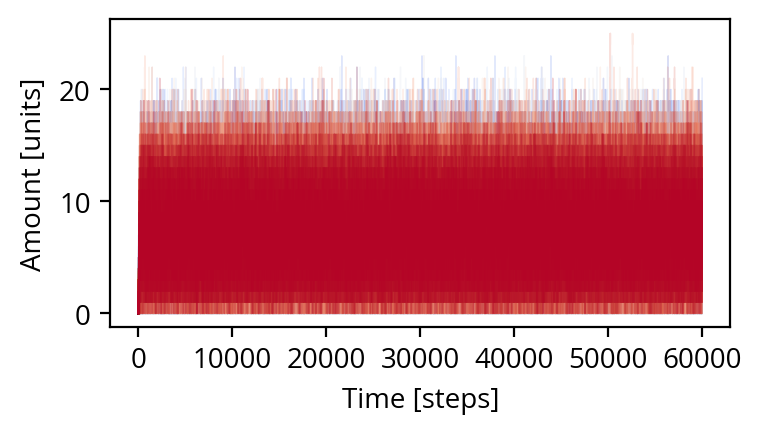

In [94]:
delta_t = 5e-3
n_steps = 60000
n_trials = 2000

# k_dec = rng.normal(size=n_trials)+1
k_dec = rng.normal(size=n_trials)*0.1 + 3
k_prod = rng.normal(size=n_trials)*3 + 20
A_0 = 0

A = [np.ones(n_trials)*A_0]
# Extract the rs all together so we can spare some time
rs_dec = rng.uniform(0,1,(n_steps, n_trials))
rs_prod = rng.uniform(0,1,(n_steps, n_trials))

for rd, rp in zip(rs_dec, rs_prod):
    decayed_indexes = np.where(rd < A[-1] * k_dec * delta_t)
    produced_indexes = np.where(rp < k_prod * delta_t)
    
    new_A = A[-1].copy()
    new_A[decayed_indexes] -= 1
    new_A[produced_indexes] += 1
    A.append(new_A)

A = np.stack(A)
plot_series(A.T)

(array([  5.,  20.,  60.,   0., 111., 199.,   0., 283., 305.,   0., 253.,
        269., 192.,   0., 146.,  69.,   0.,  41.,  33.,   0.,   6.,   3.,
          2.,   0.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ,
         7.7,  8.4,  9.1,  9.8, 10.5, 11.2, 11.9, 12.6, 13.3, 14. , 14.7,
        15.4, 16.1, 16.8, 17.5, 18.2, 18.9, 19.6, 20.3, 21. ]),
 <BarContainer object of 30 artists>)

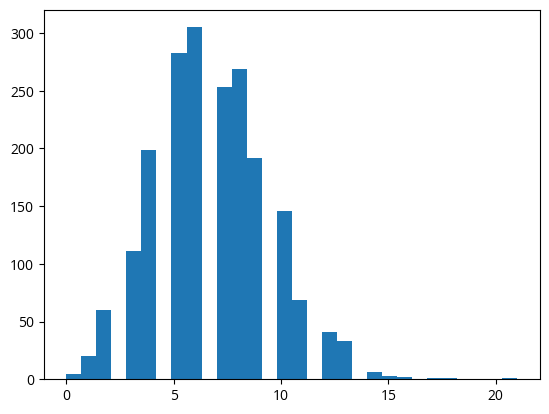

In [95]:
plt.hist(A[-1], bins=30)

(array([ 20.,   0.,   0.,   0.,   0.,   0.,  60.,   0.,   0.,   0., 111.,
          0.,   0., 199.,   0., 283.,   0., 305.,   0., 253., 269., 192.,
        146.,  69.,  41.,  33.,   9.,   3.,   1.,   1.]),
 array([9.99999951e-08, 1.01484178e-01, 2.02968256e-01, 3.04452334e-01,
        4.05936412e-01, 5.07420490e-01, 6.08904568e-01, 7.10388647e-01,
        8.11872725e-01, 9.13356803e-01, 1.01484088e+00, 1.11632496e+00,
        1.21780904e+00, 1.31929312e+00, 1.42077719e+00, 1.52226127e+00,
        1.62374535e+00, 1.72522943e+00, 1.82671351e+00, 1.92819758e+00,
        2.02968166e+00, 2.13116574e+00, 2.23264982e+00, 2.33413390e+00,
        2.43561797e+00, 2.53710205e+00, 2.63858613e+00, 2.74007021e+00,
        2.84155429e+00, 2.94303836e+00, 3.04452244e+00]),
 <BarContainer object of 30 artists>)

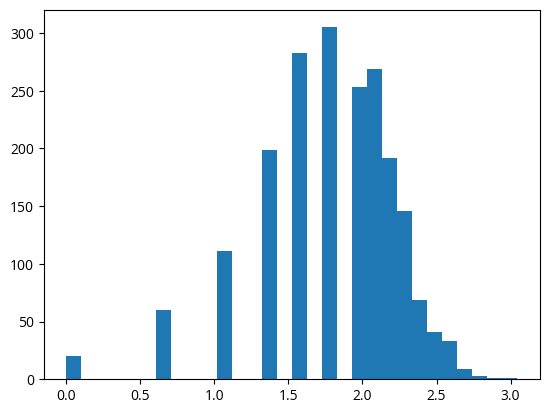

In [96]:
offset_exponent = -7
off_log_A = np.log(A + 10**offset_exponent)
plot_indexes = np.where(off_log_A[-1] > offset_exponent)
plot_data = off_log_A[-1][plot_indexes]

plt.hist(plot_data, bins=30)